# Activity 2.2.6 Sentiment analysis and text classification

In this activity, you will build a sentiment analysis model using Python and a data set of customer reviews. You will preprocess the data and fine-tune, evaluate, and test the model.


## Objective
In this activity, you will download a data set from Hugging Face and conduct text classification on it. Your objective is to analyse how different parameter choices affect the performance of a sentiment classifier.

You will complete this in your Notebook, where you will:

- create and train sentiment classifier RNN models
- evaluate model performance.



## Assessment criteria

By completing this activity, you will be able to provide evidence that you can:
*   apply various text preprocessing techniques and representation methods to preprocess and analyse textual data.
*   comprehend and implement different types of recurrent neural networks (RNNs) and understand their applications in NLP.
*   build and fine-tune advanced NLP models for specific natural language processing tasks.


## Activity guidance

1. Install the necessary packages that will be useful in this activity
2. Load the dataset sst5 from hugging face (https://huggingface.co/datasets/SetFit/sst5)

3. Create dataframes of the train and train split
4. Split the train dataframe into train and validation in the ratio of 8:2
5. Preprocess the dataset, set the maximum size to 200, vocabulary size to 30000
6. During tokenisation, mark out of vocabulary words as "[OOV]"
7. Pad your sequences with special tokens
8. Train a sentiment classifier on the dataset and compare different models for text classification
9.Train for 5 epochs
- Train with a vanilla RNN
- Train with an LSTM
- Is there any difference between a GRU and an LSTM?
- Train with a bidirectional LSTM
10. Comment on the performance of all the models


In [1]:
# Install the necessary packages that will be useful in this activity.
!pip install -U datasets
!pip install nltk
!pip install spacy
!pip install beautifulsoup4
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Load the data set sst2 from Hugging Face (https://huggingface.co/datasets/sst2).
from datasets import load_dataset

dataset = load_dataset("SetFit/sst5")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
})

In [4]:
# Create dataframes of the train and validation split.
train_text = dataset['train']['text']
val_text = dataset['validation']['text']
test_text = dataset['test']['text']
train_label = dataset['train']['label']
val_label = dataset['validation']['label']
test_label = dataset['test']['label']

import pandas as pd
df_train = pd.DataFrame()
df_train['text'] = train_text
df_train['label'] = train_label
df_val = pd.DataFrame()
df_val['text'] = val_text
df_val['label'] = val_label

##Preprocess the data

In [5]:
# Preprocess the dataset,  set the maximum size to 200, vocabulary size to 30000
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# parameters
max_length = 200
vocab_size = 3000
padding_type = 'post'
trunc_type = 'post'

# initialise the tokeniser
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>') #mark out of vocabulary words as "<OOV>"
tokenizer.fit_on_texts(train_text)
tokenizer.fit_on_texts(val_text)

# tokenise the sentences
train_sequences = tokenizer.texts_to_sequences(train_text)
val_sequences = tokenizer.texts_to_sequences(val_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

# pad the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# prepare the labels
train_labels = np.array(train_label)
val_labels = np.array(val_label)
test_labels = np.array(test_label)


##Train a simple RNN

In [6]:
# Train a sentiment classifier on the dataset and compare different models for text classification
# Train a vanilla RNN for 5 epochs
from tensorflow.keras.layers import Dense, Embedding, LSTM,SimpleRNN, GRU, Bidirectional,SpatialDropout1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Define a function to reset the session.
def reset_session():
    tf.keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

reset_session()
embedding_vector_length = 32
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length))
model1.add(SimpleRNN(100))
model1.add(Dense(5, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.build(input_shape=(None, max_length))  # batch size is None
print(model1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │        96,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        13,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,805 (428.93 KB)

 Trainable params: 109,805 (428.93 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
#fit the model
rnn_history = model1.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    batch_size=64)

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.2422 - loss: 1.5853 - val_accuracy: 0.2534 - val_loss: 1.5823
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.2689 - loss: 1.5665 - val_accuracy: 0.2534 - val_loss: 1.5832
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.2647 - loss: 1.5671 - val_accuracy: 0.2589 - val_loss: 1.5759
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.2578 - loss: 1.5891 - val_accuracy: 0.2525 - val_loss: 1.6153
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.2589 - loss: 1.5789 - val_accuracy: 0.2525 - val_loss: 1.6060


In [8]:
#evaluate the model
rnn_scores = model1.evaluate(test_padded, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (rnn_scores[1]*100))

Accuracy: 22.99%


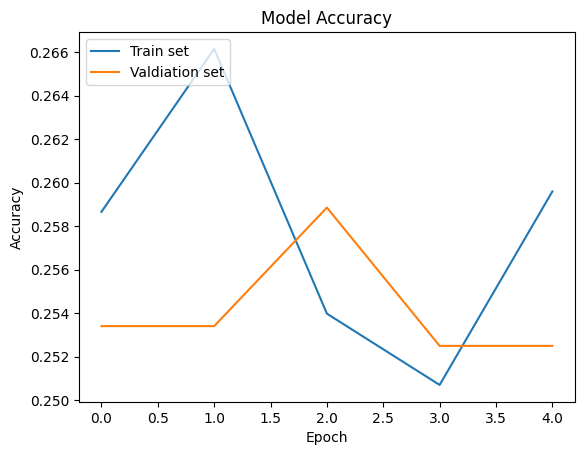

In [9]:
import matplotlib.pyplot as plt
# visualise the results
# summarise history for accuracy.
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Valdiation set'], loc='upper left')
plt.show()

##Train with an LSTM

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - accuracy: 0.2548 - loss: 1.5793 - val_accuracy: 0.2534 - val_loss: 1.5807
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 38s 283ms/step - accuracy: 0.2672 - loss: 1.5650 - val_accuracy: 0.2534 - val_loss: 1.5788
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - accuracy: 0.2705 - loss: 1.5646 - val_accuracy: 0.2534 - val_loss: 1.5772
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 42s 294ms/step - accuracy: 0.2750 - loss: 1.5643 - val_accuracy: 0.2534 - val_loss: 1.5760
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.2754 - loss: 1.5642 - val_accuracy: 0.2534 - val_loss: 1.5753
Accuracy: 23.08%


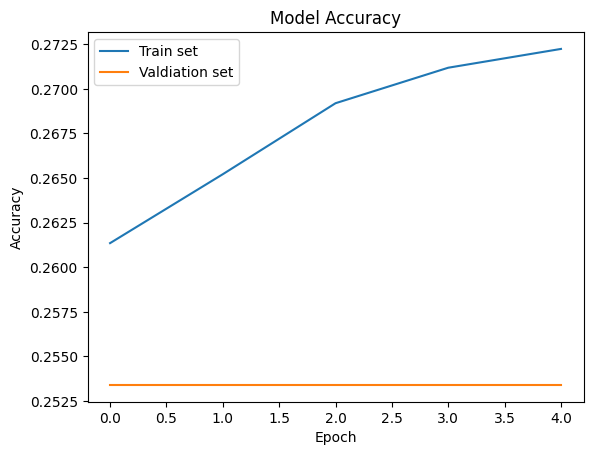

In [10]:
reset_session()
embedding_vector_length = 32
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length))
model2.add(LSTM(100))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.build(input_shape=(None, max_length))  # batch size is None
#fit the model
lstm_history = model2.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    batch_size=64)
#evaluate the model
lstm_scores = model2.evaluate(test_padded, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (lstm_scores[1]*100))
import matplotlib.pyplot as plt
# visualise the results
# summarise history for accuracy.
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Valdiation set'], loc='upper left')
plt.show()


##Train with a GRU

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 52s 361ms/step - accuracy: 0.2544 - loss: 1.5753 - val_accuracy: 0.2534 - val_loss: 1.5819
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 336ms/step - accuracy: 0.2650 - loss: 1.5649 - val_accuracy: 0.2534 - val_loss: 1.5797
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 81s 330ms/step - accuracy: 0.2704 - loss: 1.5645 - val_accuracy: 0.2534 - val_loss: 1.5779
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 83s 337ms/step - accuracy: 0.2744 - loss: 1.5643 - val_accuracy: 0.2534 - val_loss: 1.5766
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 48s 355ms/step - accuracy: 0.2751 - loss: 1.5641 - val_accuracy: 0.2534 - val_loss: 1.5758
Accuracy: 23.08%


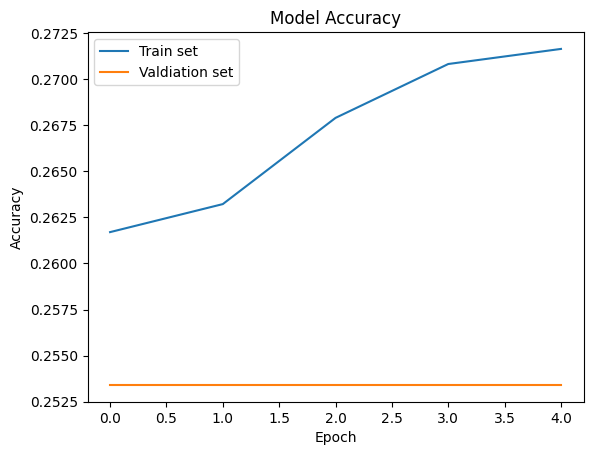

In [11]:
reset_session()
embedding_vector_length = 32
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length))
model3.add(GRU(100))
model3.add(Dense(5, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.build(input_shape=(None, max_length))  # batch size is None
#fit the model
gru_history = model3.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    batch_size=64)
#evaluate the model
gru_scores = model3.evaluate(test_padded, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (gru_scores[1]*100))
import matplotlib.pyplot as plt
# visualise the results
# summarise history for accuracy.
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Valdiation set'], loc='upper left')
plt.show()

##Train with bidirectional LSTM

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 460ms/step - accuracy: 0.2750 - loss: 1.5732 - val_accuracy: 0.3379 - val_loss: 1.4879
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 62s 460ms/step - accuracy: 0.3858 - loss: 1.4169 - val_accuracy: 0.3978 - val_loss: 1.3675
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 62s 463ms/step - accuracy: 0.4742 - loss: 1.2183 - val_accuracy: 0.4015 - val_loss: 1.3754
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 90s 524ms/step - accuracy: 0.5386 - loss: 1.1010 - val_accuracy: 0.3860 - val_loss: 1.4381
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 498ms/step - accuracy: 0.5695 - loss: 1.0173 - val_accuracy: 0.3751 - val_loss: 1.5078
Accuracy: 40.23%


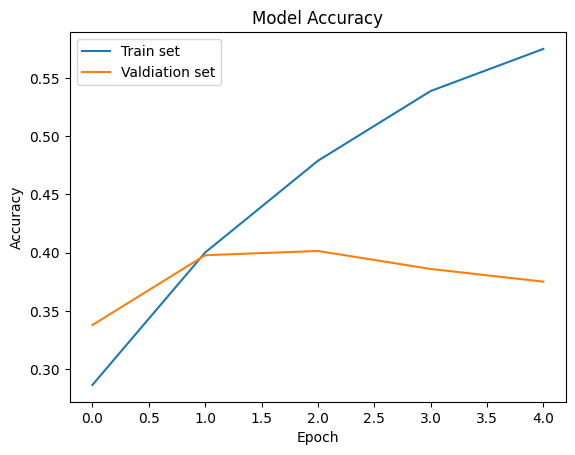

In [12]:
reset_session()
embedding_vector_length = 32
model4 = Sequential()
model4.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length))
model4.add(Bidirectional(LSTM(100)))
model4.add(Dense(5, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.build(input_shape=(None, max_length))  # batch size is None
#fit the model
bLSTM_history = model4.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=5,
    batch_size=64)
#evaluate the model
bLSTM_scores = model4.evaluate(test_padded, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (bLSTM_scores[1]*100))
import matplotlib.pyplot as plt
# visualise the results
# summarise history for accuracy.
plt.plot(bLSTM_history.history['accuracy'])
plt.plot(bLSTM_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Valdiation set'], loc='upper left')
plt.show()

##Evaluate results

In [13]:
print("RNN Accuracy: %.2f%%" % (rnn_scores[1]*100))
print("LSTM Accuracy: %.2f%%" % (lstm_scores[1]*100))
print("GRU Accuracy: %.2f%%" % (gru_scores[1]*100))
print("Accuracy: %.2f%%" % (bLSTM_scores[1]*100))

RNN Accuracy: 22.99%
LSTM Accuracy: 23.08%
GRU Accuracy: 23.08%
Accuracy: 40.23%


Model performance significantly increased when using a bidirectional LSTM athough does take significantly longer to run. Consider running with a larger number of epochs and regularisation techniques to increase accuracy and reduce the likelihood of overfitting.